<a href="https://colab.research.google.com/github/ngildersleeve/test-repo/blob/main/AutoEncoderProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#import necessary libraries
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [6]:
#Import Data
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

#Normalize data
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255





11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Building the autoencoder

In [2]:
#Definitions
input_dim = 28*28
encoding_dim = 32

#Encoder
input_layer = Input(shape=(input_dim,))
encoder1 = Dense(256, activation = 'relu')(input_layer)
encoder2 = Dense(128, activation = 'relu')(encoder1)
encoder3 = Dense(64, activation = 'relu')(encoder2)
bottleneck = Dense(32, activation = 'relu')(encoder3)

#Decoder
decoder1 = Dense(64, activation = 'relu')(bottleneck)
decoder2 = Dense(128, activation = 'relu')(decoder1)
decoder3 = Dense(256, activation = 'relu')(decoder2)
output_layer = Dense(input_dim, activation = 'sigmoid')(decoder3)

#Autoencoder
autoencoder = Model(inputs = input_layer, outputs = output_layer)
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')

Training the Autoencoder

In [7]:
autoencoder.fit(
    x_train.reshape(-1, input_dim),
    x_train.reshape(-1, input_dim),
    epochs = 50,
    batch_size = 128,
    shuffle = True,
    validation_data = (x_test.reshape(-1, input_dim), x_test.reshape(-1, input_dim))
)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - loss: 0.2714 - val_loss: 0.1399
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.1339 - val_loss: 0.1178
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 0.1161 - val_loss: 0.1085
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 0.1088 - val_loss: 0.1038
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 0.1039 - val_loss: 0.1001
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - loss: 0.1000 - val_loss: 0.0970
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 0.0974 - val_loss: 0.0964
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.0948 - val_loss: 0.0930
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 0.0932 - val_loss: 0.0920
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 0.0919 - val_loss: 0.0904
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 0.0908 - val_loss: 0.0895
Epoch 12/50
469/469 ━━━━━━━━━━━━━━

Visual Check on Autoencoder

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


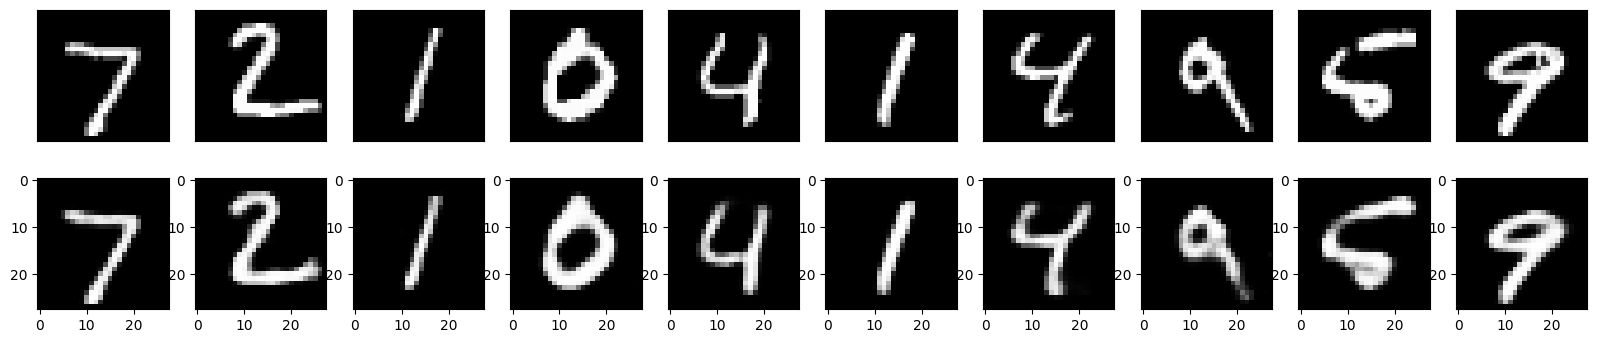

In [8]:
import matplotlib.pyplot as plt

#Predict the test data
reconstructed_images = autoencoder.predict(x_test.reshape(-1, input_dim))

#Visualize Results
n = 10
plt.figure(figsize = (20, 4))

for i in range(n):
  #Display original
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #Display reconstruction
  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(reconstructed_images[i].reshape(28, 28))
  plt.gray()

plt.show()

The image reproduction is very good here. Lets see if we can do it with fewer nodes in the bottle neck.

In [9]:
#Encoder
input_layer = Input(shape=(input_dim,))
encoder1 = Dense(256, activation = 'relu')(input_layer)
encoder2 = Dense(128, activation = 'relu')(encoder1)
encoder3 = Dense(64, activation = 'relu')(encoder2)
bottleneck = Dense(16, activation = 'relu')(encoder3) #changing the bottleneck for 16 nodes

#Decoder
decoder1 = Dense(64, activation = 'relu')(bottleneck)
decoder2 = Dense(128, activation = 'relu')(decoder1)
decoder3 = Dense(256, activation = 'relu')(decoder2)
output_layer = Dense(input_dim, activation = 'sigmoid')(decoder3)

#Autoencoder
autoencoder = Model(inputs = input_layer, outputs = output_layer)
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [10]:
autoencoder.fit(
    x_train.reshape(-1, input_dim),
    x_train.reshape(-1, input_dim),
    epochs = 50,
    batch_size = 128,
    shuffle = True,
    validation_data = (x_test.reshape(-1, input_dim), x_test.reshape(-1, input_dim))
)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 0.2743 - val_loss: 0.1425
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.1373 - val_loss: 0.1231
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.1227 - val_loss: 0.1163
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - loss: 0.1160 - val_loss: 0.1107
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.1110 - val_loss: 0.1076
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.1076 - val_loss: 0.1053
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 0.1057 - val_loss: 0.1035
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.1040 - val_loss: 0.1029
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 0.1026 - val_loss: 0.1011
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.1013 - val_loss: 0.1007
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.1007 - val_loss: 0.0996
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━

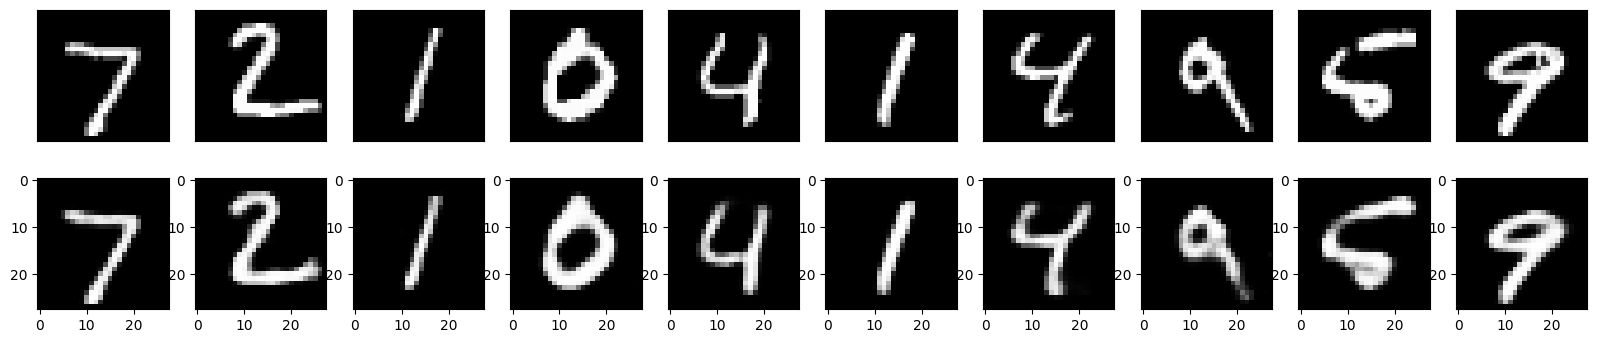

In [11]:
#Visualize Results
n = 10
plt.figure(figsize = (20, 4))

for i in range(n):
  #Display original
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #Display reconstruction
  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(reconstructed_images[i].reshape(28, 28))
  plt.gray()

plt.show()

Concluding, it does look like we can do a faithful reconstruction using a 16 node bottleneck.